# Data Extraction of Tox21 Assay CSV files

## Using Pandas to read file

In [8]:
import pandas as pd

In [35]:
!ls tox21*.csv

tox21-ap1-bla-agonist-p1_pubchem_summary.csv
tox21-esre-bla-p1_summary.csv
tox21-nfkb-bla-p1_summary.csv
tox21-ror-cho-antagonist-p1_pubchem_summary.csv
tox21-rxr-bla-agonist-p1_pubchem_summary.csv


In [36]:
import re

In [9]:
!head -3 tox21-esre-bla-p1_summary.csv

In [10]:
data = pd.read_csv("tox21-esre-bla-p1_summary.csv")

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9315 entries, 0 to 9314
Data columns (total 22 columns):
PUBCHEM_SID                                9315 non-null int64
PUBCHEM_EXT_DATASOURCE_REGID               9315 non-null object
PUBCHEM_ACTIVITY_OUTCOME                   9315 non-null int64
PUBCHEM_ACTIVITY_SCORE                     9315 non-null int64
PUBCHEM_ACTIVITY_URL                       0 non-null float64
PUBCHEM_ASSAYDATA_COMMENT                  0 non-null float64
PUBCHEM_ASSAYDATA_REVOKE                   0 non-null float64
Activity Summary                           9315 non-null object
Ratio Activity                             9315 non-null object
Ratio Potency (uM)                         521 non-null float64
Ratio Efficacy (%)                         9161 non-null float64
530 nm Activity                            9315 non-null object
530 nm Potency (uM)                        913 non-null float64
530 nm Efficacy (%)                        8745 non-null float64
460 

In [12]:
len(data) #length of data should be around 10,000 because each CSV file tests from the Tox21 10K library

9315

In [13]:
data.columns

Index(['PUBCHEM_SID', 'PUBCHEM_EXT_DATASOURCE_REGID',
       'PUBCHEM_ACTIVITY_OUTCOME', 'PUBCHEM_ACTIVITY_SCORE',
       'PUBCHEM_ACTIVITY_URL', 'PUBCHEM_ASSAYDATA_COMMENT',
       'PUBCHEM_ASSAYDATA_REVOKE', 'Activity Summary', 'Ratio Activity',
       'Ratio Potency (uM)', 'Ratio Efficacy (%)', '530 nm Activity',
       '530 nm Potency (uM)', '530 nm Efficacy (%)', '460 nm Activity',
       '460 nm Potency (uM)', '460 nm Efficacy (%)', 'Viability Activity',
       'Viability Potency (uM)', 'Viability Efficacy (%)',
       'Blue (460 nm) auto fluorescence outcome', 'Sample Source'],
      dtype='object')

In [38]:
data[["PUBCHEM_SID", "PUBCHEM_ACTIVITY_OUTCOME"]].head()

,PUBCHEM_SID,PUBCHEM_ACTIVITY_OUTCOME
0,144213813,2
1,144207253,2
2,144209579,2
3,170466763,2
4,144210136,2


In [7]:
data.PUBCHEM_ACTIVITY_OUTCOME.head()

0    2
1    2
2    2
3    2
4    2
Name: PUBCHEM_ACTIVITY_OUTCOME, dtype: int64

In [8]:
data.PUBCHEM_SID.head(10)

0    144213813
1    144207253
2    144209579
3    170466763
4    144210136
5    144210111
6    170466895
7    144207908
8    144212387
9    144208126
Name: PUBCHEM_SID, dtype: int64

In [9]:
data.PUBCHEM_SID.tail(10)

9305    170466888
9306    170466889
9307    170466890
9308    170466891
9309    170466892
9310    170466893
9311    170466894
9312    170466896
9313    170466898
9314    170466899
Name: PUBCHEM_SID, dtype: int64

In [16]:
import matplotlib.pyplot as plt

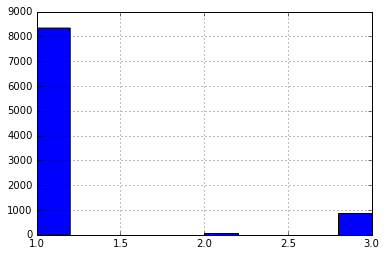

In [17]:
%matplotlib inline
data["PUBCHEM_ACTIVITY_OUTCOME"].hist()

## Using Glob to read files

In [21]:
import glob

In [19]:
!ls tox*.csv

tox21-ap1-bla-agonist-p1_pubchem_summary.csv
tox21-esre-bla-p1_summary.csv
tox21-nfkb-bla-p1_summary.csv
tox21-ror-cho-antagonist-p1_pubchem_summary.csv
tox21-rxr-bla-agonist-p1_pubchem_summary.csv


In [12]:
print(glob.glob('tox21*.csv'))

['tox21-ap1-bla-agonist-p1_pubchem_summary.csv', 'tox21-esre-bla-p1_summary.csv', 'tox21-nfkb-bla-p1_summary.csv', 'tox21-ror-cho-antagonist-p1_pubchem_summary.csv', 'tox21-rxr-bla-agonist-p1_pubchem_summary.csv']


In [22]:
filelist = glob.glob('tox21*.csv')

In [14]:
filelist[:]

['tox21-ap1-bla-agonist-p1_pubchem_summary.csv',
 'tox21-esre-bla-p1_summary.csv',
 'tox21-nfkb-bla-p1_summary.csv',
 'tox21-ror-cho-antagonist-p1_pubchem_summary.csv',
 'tox21-rxr-bla-agonist-p1_pubchem_summary.csv']

In [25]:
#Combine all five csv files into one
all_data = pd.DataFrame()
for f in filelist:
    df = pd.read_csv(f, header=None)
    all_data = all_data.append(df,ignore_index=True)


In [26]:
all_data.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,PUBCHEM_SID,PUBCHEM_EXT_DATASOURCE_REGID,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,PUBCHEM_ASSAYDATA_REVOKE,Activity Summary,Ratio Activity,Ratio Potency (uM),...,530 nm Potency (uM),530 nm Efficacy (%),460 nm Activity,460 nm Potency (uM),460 nm Efficacy (%),Viability Activity,Viability Potency (uM),Viability Efficacy (%),Blue (46 nm) auto fluorescence outcome,Supplier
1,170466345,NCGC00167729-03,2,100,NaN,NaN,NaN,active agonist,active agonist,0.057808791,...,0.049582363,-36.37264558,active agonist,0.039384671,100.82019,inactive,NaN,0,inactive,Tocris
2,144212283,NCGC00255876-01,2,90,NaN,NaN,NaN,active agonist,active agonist,0.30895594,...,0.255013525,-35.50505328,active agonist,0.202564443,103.2126446,inactive,NaN,0,inactive,LightBiologicals
3,144206433,NCGC00247717-01,2,86,NaN,NaN,NaN,active agonist,active agonist,0.464819758,...,0.242075728,-33.82053518,active agonist,0.341941055,106.7612405,inactive,NaN,0,inactive,RTI
4,144211912,NCGC00255796-01,2,80,NaN,NaN,NaN,active agonist,active agonist,0.518676473,...,2.649902421,-86.4088768,active agonist,0.419981231,90.41823781,active antagonist,4.119993672,-94.67992289,inactive,LightBiologicals


## Data Visulaization: Histogram

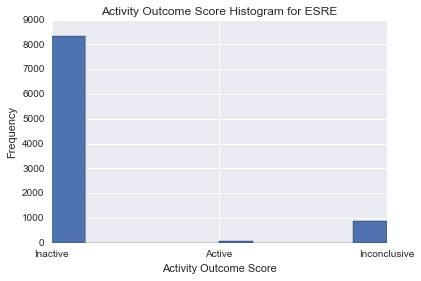

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

#Label x & y axis and title
ax = data.PUBCHEM_ACTIVITY_OUTCOME.hist()
ax.set_xlabel('Activity Outcome Score')
ax.set_ylabel('Frequency')
ax.set_title('Activity Outcome Score Histogram for ESRE')

#Label x axis with text values
text_values = ['Inactive','Active','Inconclusive']
x_values = np.arange(1, len(text_values) + 1, 1)
plt.xticks(x_values, text_values)
plt.show()

fig = ax.get_figure()    
fig.set_size_inches(8,6)
fig.savefig('ActOutScoreHistogram.png', dpi=100)

## Data Visualization: Pie Chart

In [18]:
#find total number of compounds with Active Outcome Score of 1 (inactive)
print(sum(data['PUBCHEM_ACTIVITY_OUTCOME'] == 1))

8336


In [19]:
#find total number of compounds with Active Outcome Score of 2 (active)
print(sum(data['PUBCHEM_ACTIVITY_OUTCOME'] == 2))

83


In [20]:
#find total number of compounds with Active Outcome Score of 3 (inconclusive)
print(sum(data['PUBCHEM_ACTIVITY_OUTCOME'] == 3))

896


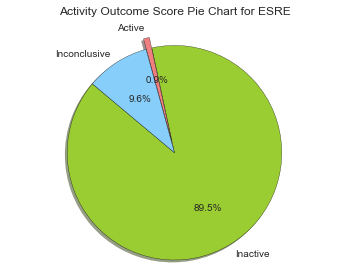

In [21]:
#Data to plot
labels = 'Inactive', 'Active', 'Inconclusive'
sizes = [8336, 83, 896] #input numbers calculated above
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0.1, 0)
 
#Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

#Title
plt.title('Activity Outcome Score Pie Chart for ESRE', y=1.08)

plt.axis('equal')
plt.show()

## Data Extraction: Within same file

In [46]:
t_array = (3,5,7)

In [47]:
t_array[1]=33

TypeError: 'tuple' object does not support item assignment

In [42]:
my_array = [3,5,7, "mystring"]

In [44]:
my_array[2] = "go"

In [45]:
my_array[2] 

'go'

In [49]:
output = []

outcome = open( 'tox21-esre-bla-p1_summary.csv', 'r' )
for line in outcome:
    cells = line.split( "," )
    output.append( [ cells[0], cells[2], cells[3] ] ) #only want PUBCHEM_SID, PUBCHEM_ACTIVITY_OUTCOME, and PUBCHEM_ACTIVITY_SCORE columns
outcome.close()

print (output)

#http://stackoverflow.com/questions/15286560/python-using-excel-csv-file-to-read-only-certain-columns-and-rows

[['PUBCHEM_SID', 'PUBCHEM_ACTIVITY_OUTCOME', 'PUBCHEM_ACTIVITY_SCORE'], ['144213813', '2', '59'], ['144207253', '2', '57'], ['144209579', '2', '54'], ['170466763', '2', '54'], ['144210136', '2', '54'], ['144210111', '2', '53'], ['170466895', '2', '53'], ['144207908', '2', '53'], ['144212387', '2', '53'], ['144208126', '2', '53'], ['144209930', '2', '53'], ['144210121', '2', '53'], ['144209798', '2', '52'], ['144209427', '2', '52'], ['144212321', '2', '51'], ['144211088', '2', '51'], ['144210527', '2', '50'], ['144213197', '2', '50'], ['144210609', '2', '49'], ['144209978', '2', '49'], ['144213317', '2', '49'], ['144210703', '2', '48'], ['144212084', '2', '48'], ['144213892', '2', '47'], ['144212558', '2', '46'], ['144211071', '2', '46'], ['144209003', '2', '46'], ['144213707', '2', '46'], ['144210158', '2', '46'], ['144209703', '2', '46'], ['144210595', '2', '46'], ['144208064', '2', '45'], ['144213129', '2', '45'], ['144206840', '2', '45'], ['170466119', '2', '45'], ['170464908', '2',

## Data Extraction: Among different files

In [23]:
#add columns from different files and export as new file

import csv
file_names = ['tox21-esre-bla-p1_summary.csv', 'tox21-nfkb-bla-p1_summary.csv', 'tox21-ror-cho-antagonist-p1_pubchem_summary.csv', 'tox21-rxr-bla-agonist-p1_pubchem_summary.csv', 'tox21-ap1-bla-agonist-p1_pubchem_summary.csv']
o_data = []

for afile in file_names:
    file_h = open(afile)
    a_list = []
    a_list.append(afile)
    csv_reader = csv.reader(file_h, delimiter=' ')
    for row in csv_reader:
        a_list.append(row[0])
    o_data.append((n for n in a_list))
    file_h.close()
    
with open('output.csv', 'w') as op_file:
    csv_writer = csv.writer(op_file, delimiter=' ')
    for row in list(zip(*o_data)):
        csv_writer.writerow(row)
        
op_file.close()

#http://stackoverflow.com/questions/23072082/combining-columns-of-multiple-files-in-one-file-python

In [52]:
my_t = (1,2,3,"riuyio")

In [55]:
my_t

(1, 2, 3, 'riuyio')

In [53]:
my_forced_list = list(my_t)

In [54]:
my_forced_list

[1, 2, 3, 'riuyio']